In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Prayag Chawla\AppData\Local\Temp\ipykernel_14928\1744590592.py:31: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize((desired_width, desired_height), Image.ANTIALIAS)


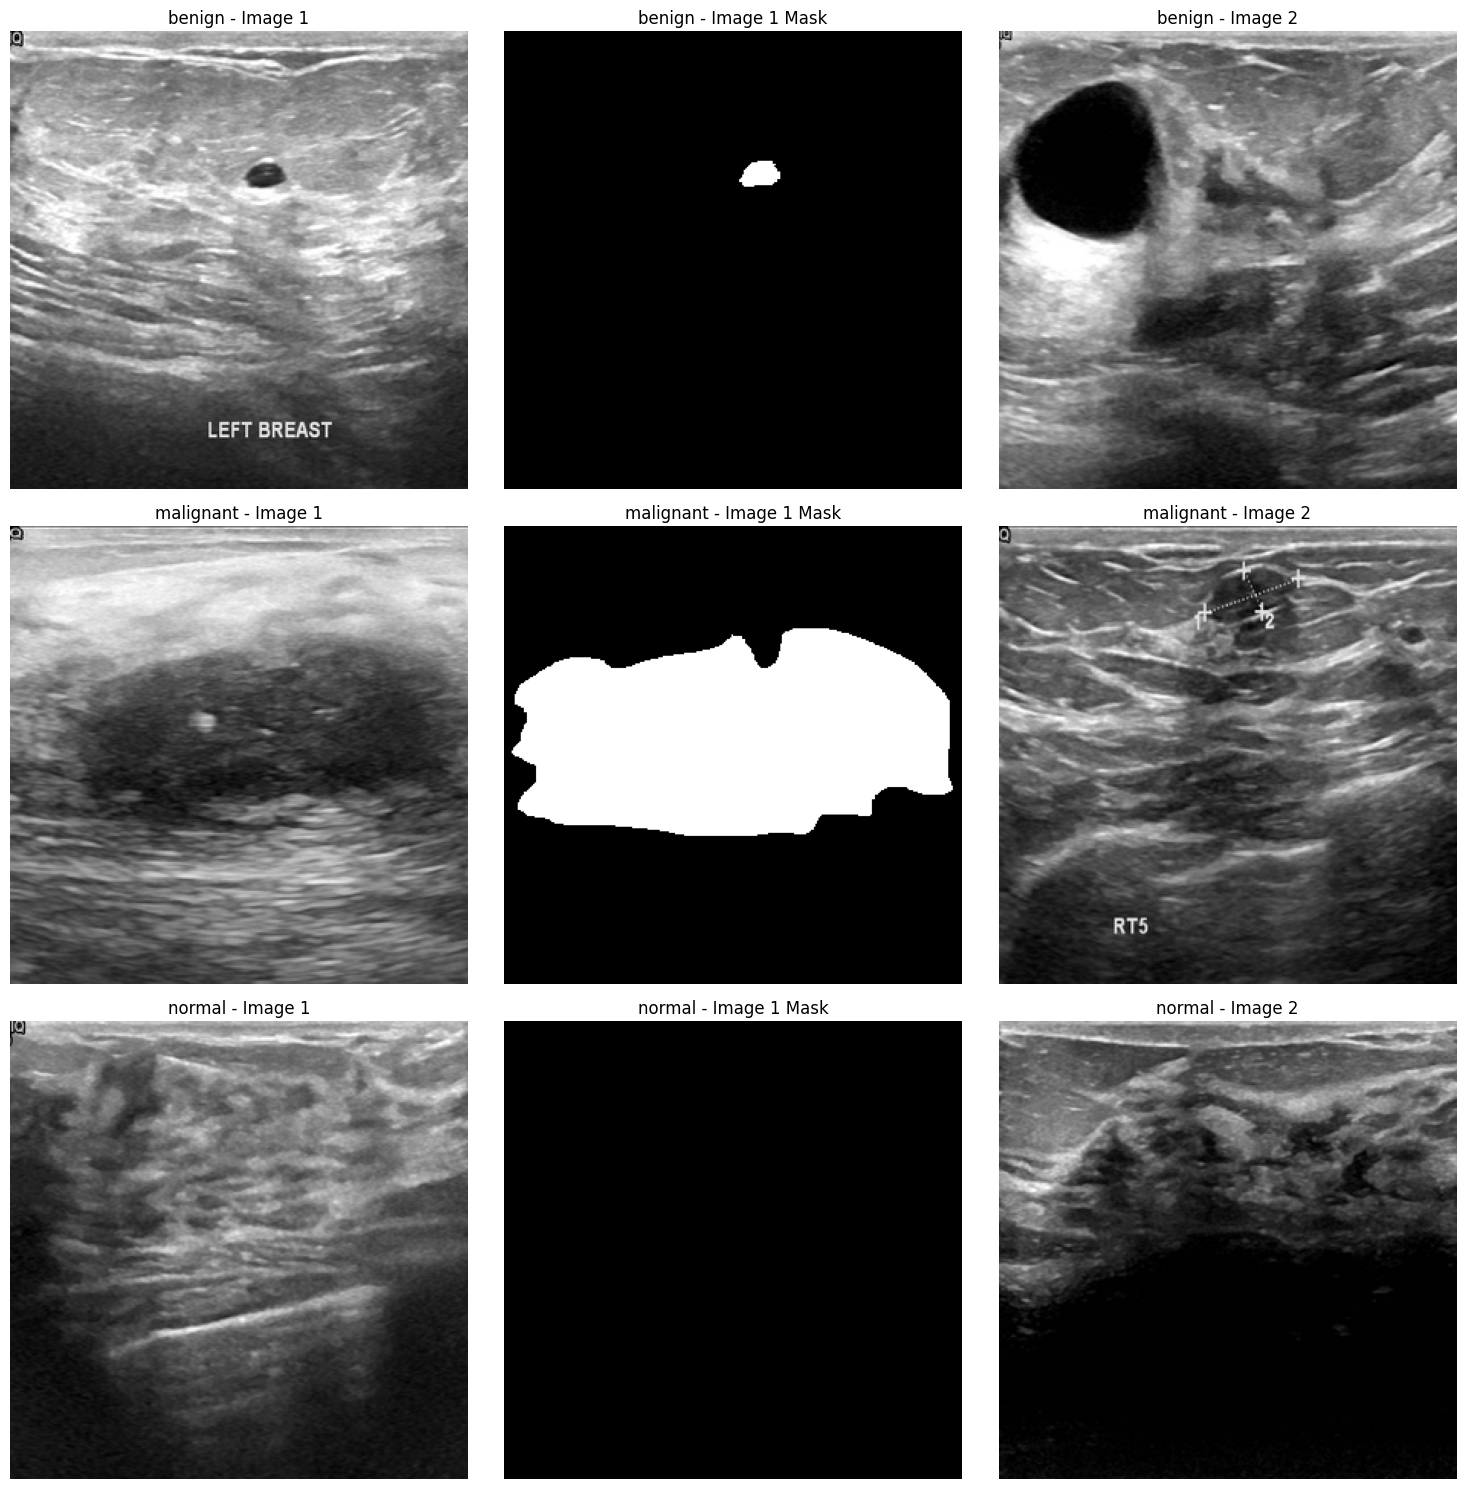

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the labels and corresponding directories
labels = ['benign', 'malignant', 'normal']
data_dir = r"D:\Prayag Files\TIET\Extras\hackathons\analog\Dataset_BUSI_with_GT"  # Use raw string for Windows paths

# Create a figure to display the images
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Desired width and height for each image
desired_width = 300  # Adjust as needed
desired_height = 300  # Adjust as needed

for i, label in enumerate(labels):
    label_dir = os.path.join(data_dir, label)
    
    # Get a list of image files
    image_files = [file for file in os.listdir(label_dir) if file.endswith('.png')]
    
    # Sort the list of image files
    image_files = sorted(image_files)
    
    # Loop through the first 3 image files per label
    for j in range(3):
        if j < len(image_files):
            # Load and resize the image
            image_path = os.path.join(label_dir, image_files[j])
            image = Image.open(image_path)
            image = image.resize((desired_width, desired_height), Image.ANTIALIAS)
            
            # Determine the label based on whether it's an image or a mask
            if j % 2 == 0:
                image_label = f'{label} - Image {j // 2 + 1}'
            else:
                image_label = f'{label} - Image {j // 2 + 1} Mask'
            
            # Display the image with the corresponding label
            axs[i, j].imshow(image)
            axs[i, j].set_title(image_label)
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()


In [3]:
class_names = ['malignant', 'normal','benign']
minority_classes = ['malignant', 'normal']

In [4]:
class_names = ['malignant', 'normal','benign']
minority_classes = ['malignant', 'normal']

In [5]:
from torchvision import transforms
from torchvision.transforms import RandomHorizontalFlip, RandomRotation, ColorJitter

# Define the transformation pipeline
min_class_transforms = transforms.Compose([
    RandomHorizontalFlip(p=0.9),
    RandomRotation(degrees=15, expand=False, center=None),
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)
])

# Example usage:
# Assuming `dataset` is your dataset object, and `index` is the index of the image you want to transform
# transformed_image = min_class_transforms(dataset[index])

# Example of applying transforms to an image:
# from PIL import Image
# img = Image.open('example.jpg')
# transformed_img = min_class_transforms(img)


In [6]:
class_names = ['malignant', 'normal','benign']
minority_classes = ['malignant', 'normal']

# Define custom data transformations for minority classes
minority_class_transforms = transforms.Compose([
    RandomHorizontalFlip(p=0.9),  # Apply with 90% probability
    RandomRotation(15, expand=False, center=None),
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])

# Define data transformations for train, validation, and test sets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        # Apply custom augmentations to minority classes
        transforms.RandomApply([minority_class_transforms], p=0.5) if any(cls in minority_classes for cls in class_names) else transforms.RandomApply([], p=0.0),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [7]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Set the path to your input folder
data_dir = r"D:\Prayag Files\TIET\Extras\hackathons\analog\Dataset_BUSI_with_GT"
# Create a list to store file paths and labels
file_paths = []
labels = []

# Loop through the subdirectories (benign, malignant, normal)
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for image_file in os.listdir(label_dir):
            if image_file.endswith('.png') and not (image_file.endswith('_mask.png') or 
                                                     image_file.endswith('_mask_1.png') or
                                                     image_file.endswith('_mask_2.png')):
                image_path = os.path.join(label_dir, image_file)
                labels.append(label)
                file_paths.append(image_path)

# Create a DataFrame to store the file paths and labels
data = pd.DataFrame({'Image_Path': file_paths, 'Label': labels})

# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.15, random_state=42, stratify=data['Label'])
train_data, val_data = train_test_split(train_data, test_size=0.15, random_state=42, stratify=train_data['Label'])

# Define the paths for the train, validation, and test directories
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/validation'
test_dir = '/kaggle/working/test'

# Create the train, validation, and test directories and subdirectories
for label in labels:
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

# Copy the images to the corresponding directories
for _, row in train_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(train_dir, label))

for _, row in val_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(val_dir, label))

for _, row in test_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(test_dir, label))

In [8]:
import os

# Function to count files in subdirectories
def count_files_in_subdirectories(base_dir, subdirectories):
    file_counts = {}
    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(base_dir, subdirectory)
        if os.path.exists(subdirectory_path):
            file_counts[subdirectory] = len(os.listdir(subdirectory_path))
    return file_counts

# List of subdirectories
subdirectories = ['benign', 'malignant', 'normal']

# Directories to process
directories = {
    'Train': '/kaggle/working/train',
    'Validation': '/kaggle/working/validation',
    'Test': '/kaggle/working/test'
}

# Count files and print results
for name, path in directories.items():
    file_counts = count_files_in_subdirectories(path, subdirectories)
    for category, count in file_counts.items():
        print(f"{name} {category}: {count}")

Train benign: 315
Train malignant: 152
Train normal: 96
Validation benign: 56
Validation malignant: 27
Validation normal: 17
Test benign: 66
Test malignant: 31
Test normal: 20


In [9]:
def train_model_with_early_stopping(model, lossFunction, optimizer, scheduler, dataloaders, dataset_sizes, class_names, device, num_epochs=20, patience=2):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')  # Initialize best_loss with a large value
    consecutive_epochs_without_improvement = 0

    # Lists to store training and validation losses
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = lossFunction(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Append training loss here
                if phase == 'train':
                    train_losses.append(loss.item())  # Append training loss
                else:
                    val_losses.append(loss.item())  # Append validation loss

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Early stopping: Check if validation loss improved
            if phase == 'validation':
                if epoch_loss < best_loss:
                    best_loss = epoch_loss
                    best_model_wts = copy.deepcopy(model.state_dict())
                    consecutive_epochs_without_improvement = 0
                else:
                    consecutive_epochs_without_improvement += 1


                val_losses.append(epoch_loss)

        # Check if early stopping criteria are met
        if consecutive_epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch} epochs")
            break

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Loss: {:.4f}'.format(best_loss))
   
    # Load best model weights
    model.load_state_dict(best_model_wts)
    
    # Calculate classification report and confusion matrix for validation data
    y_true = []
    y_pred = []

    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        for inputs, labels in dataloaders['validation']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Generate classification report
    target_names = [str(class_names[i]) for i in range(len(class_names))]
    print(classification_report(y_true, y_pred, target_names=target_names))

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    return model

In [10]:
import torch

# Determine device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [11]:
import torch
import torch.nn as nn
import torchvision.models as models

# Check if CUDA (GPU) is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load ResNet-101 with pre-trained weights
Resnet101 = models.resnet101(pretrained=True)

# Set parameters of ResNet-101 to be trainable
for param in Resnet101.parameters():
    param.requires_grad = True

# Modify the fully connected layer (FC) for your specific classification task
num_classes = len(class_names)  # Replace with the number of classes in your dataset
in_features = Resnet101.fc.in_features
Resnet101.fc = nn.Linear(in_features, num_classes)

# Move the model to the appropriate device (GPU or CPU)
Resnet_fineTuning = Resnet101.to(device)


c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models

# Assuming Resnet_fineTuning and other variables are defined properly

optimizer = optim.Adam(Resnet_fineTuning.parameters(), lr=0.00005)

# Decay LR by a factor of 0.1 every 7 epochs
Decay_Learning_Rate = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Define loss function
Loss_Function = nn.CrossEntropyLoss()


In [13]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define transforms for data augmentation and normalization
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define dataset and dataloaders
data_dir = r"D:\Prayag Files\TIET\Extras\hackathons\analog\Dataset_BUSI_with_GT"  # Replace with your dataset path

# Assuming 'train' and 'val' folders are in data_dir
full_dataset = ImageFolder(root=data_dir, transform=train_transforms)

# Split dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Define DataLoader instances
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# Define dataset sizes
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Define class names
class_names = full_dataset.classes

# Check if CUDA/GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [14]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

# Load pre-trained ResNet101 model
Resnet101 = models.resnet101(pretrained=True)

# Freeze all layers
for param in Resnet101.parameters():
    param.requires_grad = False

# Replace the fully connected layer with a new one suitable for your dataset
num_ftrs = Resnet101.fc.in_features
Resnet101.fc = nn.Linear(num_ftrs, len(class_names))

# Move model to device (GPU if available)
Resnet_fineTuning = Resnet101.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Resnet_fineTuning.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [15]:
def train_model_with_early_stopping(model, criterion, optimizer, scheduler, 
                                    train_loader, val_loader, dataset_sizes, 
                                    class_names, device, num_epochs=25, patience=5):
    best_model_wts = model.state_dict()
    best_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                dataloader = train_loader
            else:
                model.eval()   # Set model to evaluate mode
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            # Calculate epoch loss and accuracy
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model if the validation loss improves
            if phase == 'val' and epoch_loss < best_loss:
                best_loss = epoch_loss
                best_model_wts = model.state_dict()
                early_stop_counter = 0
            elif phase == 'val':
                early_stop_counter += 1

        print()

        # Early stopping condition
        if early_stop_counter >= patience:
            print(f'Early stopping triggered after {epoch+1} epochs without improvement.')
            break

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model


In [16]:
# Train the model
model_fineTuning = train_model_with_early_stopping(
    Resnet_fineTuning, criterion, optimizer, exp_lr_scheduler, 
    train_dataloader, val_dataloader, dataset_sizes, class_names, 
    device, num_epochs=5, patience=10
)

# Save the best model
torch.save(model_fineTuning.state_dict(), "/kaggle/working/Resnet_fineTuning.pth")


Epoch 0/4
----------
train Loss: 0.9037 Acc: 0.5816
val Loss: 0.9307 Acc: 0.5380

Epoch 1/4
----------
train Loss: 0.8368 Acc: 0.6014
val Loss: 0.8483 Acc: 0.6076

Epoch 2/4
----------
train Loss: 0.7926 Acc: 0.6387
val Loss: 0.8023 Acc: 0.6139

Epoch 3/4
----------
train Loss: 0.7420 Acc: 0.6521
val Loss: 0.7609 Acc: 0.6835

Epoch 4/4
----------
train Loss: 0.7180 Acc: 0.6886
val Loss: 0.7321 Acc: 0.6899



Files already downloaded and verified


c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prayag Chawla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

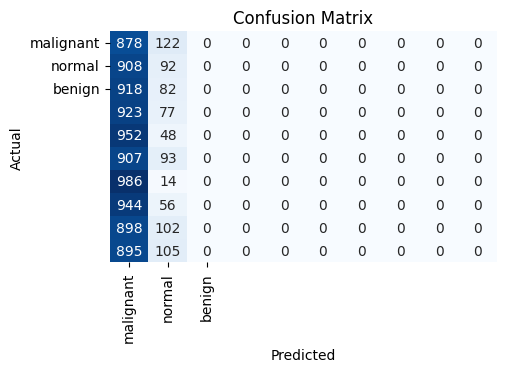

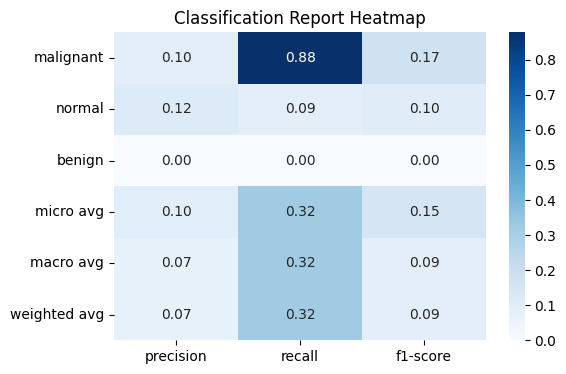

Simplified Classification Report:
           malignant    normal  benign  micro avg  macro avg  weighted avg
precision   0.095342  0.116308     0.0   0.097000   0.070550      0.070550
recall      0.878000  0.092000     0.0   0.323333   0.323333      0.323333
f1-score    0.172005  0.102736     0.0   0.149231   0.091580      0.091580


In [20]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10  # Example dataset
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming class_names is defined correctly, e.g., list of class names
class_names = ['malignant', 'normal', 'benign']  # Your actual class names

# Define transforms for data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize if necessary
])

# Load datasets
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create test dataloader
batch_size = 32
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Example of model evaluation and generating metrics
model_fineTuning.eval()  # Set model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model_fineTuning(inputs)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Generate classification report
classification_rep = classification_report(y_true, y_pred, target_names=class_names, labels=[0, 1, 2], output_dict=True)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix with class names
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Convert the classification report to a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(classification_rep).iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')  # Simplify classification report
plt.title('Classification Report Heatmap')
plt.show()

# Print the simplified classification report
print("Simplified Classification Report:")
print(pd.DataFrame(classification_rep).iloc[:-1, :])


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of images to display
num_images_to_display = 15

# Create a DataLoader for the test dataset
test_dataloader = DataLoader(image_datasets['test'], batch_size=num_images_to_display, shuffle=True, num_workers=4)

# Get a batch of test data
inputs, labels = next(iter(test_dataloader))

# Move inputs to the device
inputs = inputs.to(device)

# Convert images to grayscale
grayscale_images = inputs.cpu().numpy().mean(axis=1)  # Convert RGB to grayscale

# Get model predictions
with torch.no_grad():
    model_fineTuning.eval()
    outputs = model_fineTuning(inputs)
    _, preds = torch.max(outputs, 1)

# Plot the grayscale images with labels and predictions
plt.figure(figsize=(15, 20))  # Increase the height to accommodate 5 rows
for i in range(num_images_to_display):
    ax = plt.subplot(5, 3, i + 1)  # Adjust the layout to 5 rows by 3 columns
    ax.axis('off')
    ax.set_title(f'Actual: {class_names[labels[i]]}\nPredicted: {class_names[preds[i]]}')
    plt.imshow(grayscale_images[i], cmap='gray')  # Display the grayscale image

plt.show()

NameError: name 'image_datasets' is not defined